# Memoization

# What is a cache?

- data is stored so that requests for it are faster
- can be in hardware or software
- result of an earlier computation or a copy of data

## Hardware cache
- CPUs and GPUs have dedicated hardware caches which reduce latency of instructions and data by physical closeness
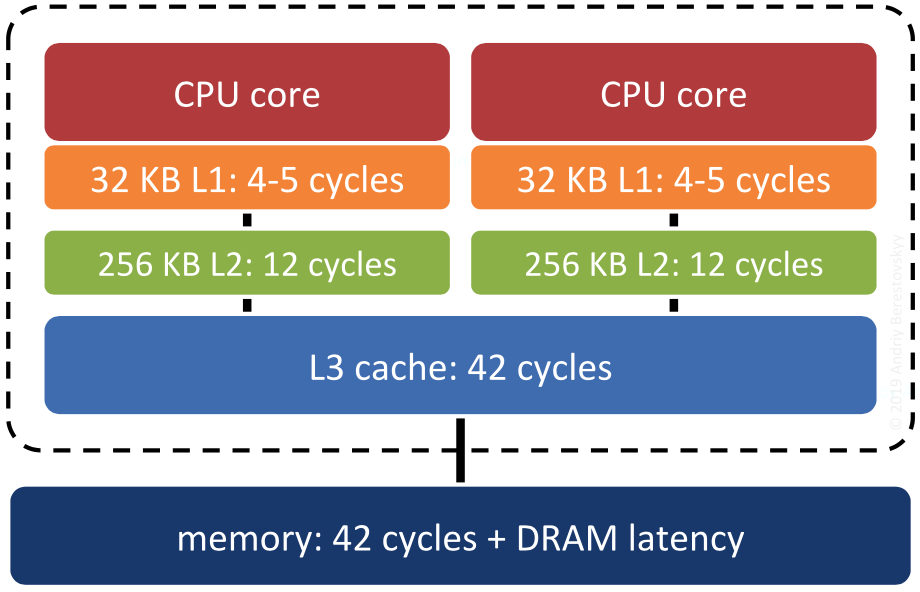

- SSDs and HDDs have hardware caches that increase throughput by locality and copying larger blocks

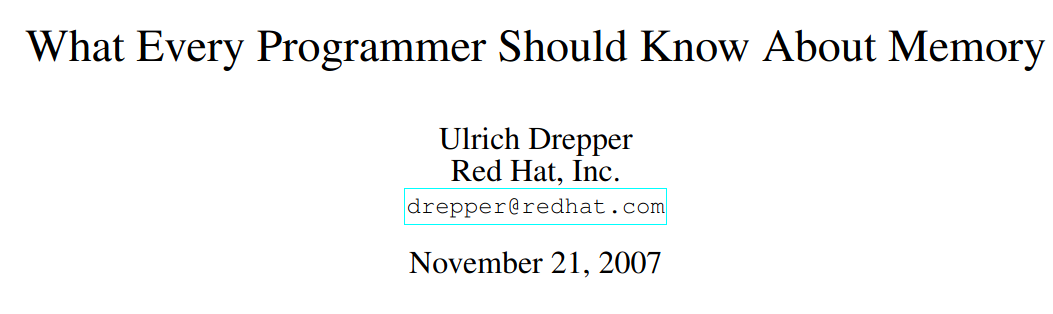
https://www.akkadia.org/drepper/cpumemory.pdf

## Software cache
- page cache: your OS keeps files and system utilities in RAM, usually freed-up when space is needed
- web cache: your browser keeps websites saved on hard disk in order to load faster
- memoization: your program keeps function results saved in RAM

## Where is memoization useful?
- functions which are called often with the same arguments
- recursive functions which call themselves multiple times with the same arguments
- expensive functions which are called more than once with the same arguments 

## Some terminology
- cache hit: function result was found in cache
- cache miss: function had to calculate the result

## Fibonacci numbers without cache

In [ ]:
import time

def fib_without_cache(n: int) -> int:
    """Compute Fibonacci number without cache."""
    if n < 2:
        fib = n
    else:
        fib = fib_without_cache(n-1) + fib_without_cache(n-2)
    return fib
        
# Execution start time
begin = time.time()
fib_without_cache(30)

# Execution end time
end = time.time()

print(f"Time taken to execute the function without cache: {end-begin}")

## Fibonacci numbers with a simple dictionary cache

In [ ]:
import time

cache = dict()

def fib_with_cache(n: int) -> int:
    """Compute Fibunacci number with dict cache."""
    if n not in cache:
        if n < 2:
            cache[n] = n
        else:
            cache[n] = fib_with_cache(n-1) + fib_with_cache(n-2)
    return cache[n]

# Execution start time
begin = time.time()
fib_with_cache(30)

# Execution end time
end = time.time()

print(f"Time taken to execute the function with dict cache: {end-begin}")

## Problem: simple dictionary will fill-up indefinitely
solution is to constrain the maximum size of the dictionary and use a caching strategy:
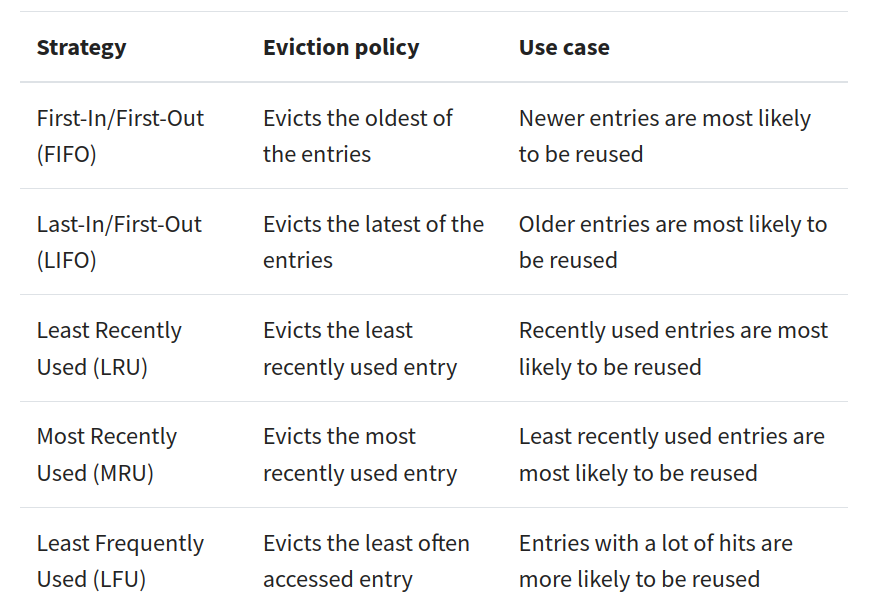

## How does the LRU cache work?
- most of the ordered caches consist of a hash map and a double linked list
- the double linked list saves the input/result pairs in order of recently accessed
- the hash map saves the input/pointer pairs which point to the position of the input in the list
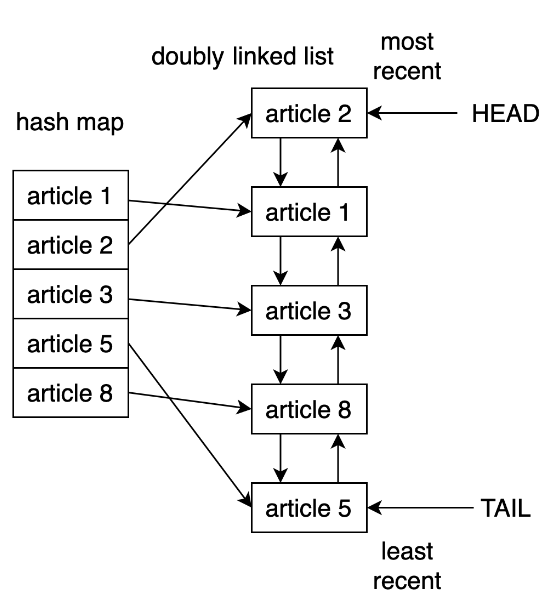

### hash map:
- look-up of entries takes O(1)
- typically is unordered

### double linked list
- look-up of entries takes O(n)
- insertion at head/deletion from tail or deletion from known address takes O(1)

## Are there any caching libries?

### Python (>= 3.9):
- functools has a cache (simple dict) and lru_cache decorator
- cachetools module has other caching strategies

### C++:
- not part of standard library but boost has a implimentation

### Julia:
- LRUCache.jl

## An example of the lru_cache decorator

In [ ]:
from functools import lru_cache
import time

@lru_cache()
def fib_with_lru_cache(n: int) -> int:
    """Compute Fibunacci number with lru cache."""
    if n < 2:
        fib = n
    else:
        fib = fib_with_lru_cache(n-1) + fib_with_lru_cache(n-2)
    return n, fib
        
# Execution start time
begin = time.time()
fib_with_lru_cache(30)

# Execution end time
end = time.time()

print(f"Time taken to execute the function with lru_cache: {end-begin}")
print(fib_with_lru_cache.cache_info())

## Parameters of the lru_cache decorator
standard signature:

In [ ]:
lru_cache(maxsize=128, typed=False)

- maxsize: maximum number of function calls stored in the cache
- typed: if set to True, different types of same function call are cached separately (f(3) vs. f(3.0))
- order is important: f(a=1, b=2) and f(b=2, a=1) will be cached separately

## Helpfull functions

- cache_parameters() shows parameters

In [ ]:
fib_with_lru_cache.cache_parameters()

- cache_info() shows hits, misses and current size

In [ ]:
fib_with_lru_cache.cache_info()

- cache_clear() empties the cache

In [ ]:
fib_with_lru_cache.cache_clear()
fib_with_lru_cache.cache_info()

## Caching method calls
@lru_cache() is stored and shared on the class level, each instance adds to the cache

In [ ]:
import time
from functools import lru_cache

class ShareCache:
    
    @lru_cache(2002)
    def nonstat_fib(self, n: int) -> int:
        """Non-static version of lru_cache."""
        if n < 2:
            fib = n 
        else:
            fib = self.nonstat_fib(n-1) + self.nonstat_fib(n-2)
        return fib

    # Ordering is important
    @staticmethod
    @lru_cache(2002)
    def stat_fib(n: int) -> int:
        """Static version of lru cache."""
        if n < 2:
            fib = n 
        else:
            fib = ShareCache.stat_fib(n-1) + ShareCache.stat_fib(n-2)
        return fib

In [ ]:
# Create instance and run non-static version
a = ShareCache()
begin = time.time()
a.nonstat_fib(1000)
end = time.time()
print("First run of non-static function")
print(f"Time taken to execute the function: {end-begin}")
print(f"{ShareCache.nonstat_fib.cache_info()}\n")

# Run same function again
begin = time.time()
a.nonstat_fib(1000)
end = time.time()
print("Second run of non-static function:")
print(f"Time taken to execute the function: {end-begin}")
print(f"{ShareCache.nonstat_fib.cache_info()}\n")

# Create second instance and run non-static version
b = ShareCache()
begin = time.time()
b.nonstat_fib(1000)
end = time.time()
print("Running non-static function in second instance")
print(f"Time taken to execute the function: {end-begin}")
print(ShareCache.nonstat_fib.cache_info())

# Self parameter is cached! This also stops instances being garbage collected!

In [ ]:
# Run static version of first instance
begin = time.time()
a.stat_fib(1000)
end = time.time()
print("First run of static function")
print(f"Time taken to execute the function: {end-begin}")
print(f"{ShareCache.stat_fib.cache_info()}\n")

# Run same function again
begin = time.time()
a.stat_fib(1000)
end = time.time()
print("Second run of static function")
print(f"Time taken to execute the function: {end-begin}")
print(f"{ShareCache.stat_fib.cache_info()}\n")

# Run static version of second instance
begin = time.time()
b.stat_fib(1000)
end = time.time()
print("Running static function in second instance")
print(f"Time taken to execute the function: {end-begin}")
print(ShareCache.stat_fib.cache_info())

# Static methods allow cache sharing over multiple instances!

 @cached_property() is stored on an instance level and used to cache an expensive calculation

In [ ]:
import time
from functools import lru_cache, cached_property

class CachedProp:
    
    def __init__(self, number):
        self.number = number
        
    def fib_without_cache(self, n: int) -> int:
        """Compute Fibonacci number without cache."""
        if n < 2:
            fib = n
        else:
            fib = self.fib_without_cache(n-1) + self.fib_without_cache(n-2)
        return fib
    
    # Cached_property is the same as
    # @property
    # @lru_cache()
    @cached_property
    def fib(self) -> int:
        """Save the result of the expensive calculation."""
        return self.fib_without_cache(self.number)

In [ ]:
# Create instance and and run getter for the first time
a = CachedProp(30)
begin = time.time()
a.fib
end = time.time()
print("Getting solution for the first time")
print(f"Time taken to execute the getter: {end-begin}\n")

# Run getter for second time
begin = time.time()
a.fib
end = time.time()
print("Getting solution for the second time")
print(f"Time taken to execute the getter: {end-begin}\n")

# However setter is not forbidden
a.fib = 1
print(f"Getter after manually setting attribute: {a.fib}\n")

# Delete value to re-calculate getter
del(a.fib)
begin = time.time()
print(f"Getter after deleting attribute: {a.fib}\n")
end = time.time()
print(f"Time taken to execute the getter: {end-begin}")

## Warning: caching only works with objects that are hashable!

type has to be immutable type to have a defined hash function

### immutable types:

int, float, decimal, complex, bool, string, tuple, range, frozenset, bytes

### mutable types:

list, dict, set, bytearray, user-defined classes


## Example of the lru_cache decorator with an unhashable parameter

In [ ]:
from functools import lru_cache
import time

lst = list(range(0,30))

@lru_cache()
def fib_with_lru_cache(n: int, lst: list) -> int:
    """Compute Fibunacci number with lru cache."""
    if n < 2:
        fib = lst[n]
    else:
        fib = fib_with_lru_cache(n-1, lst) + fib_with_lru_cache(n-2, lst)
    return n, fib
        
# Execution start time
begin = time.time()
fib_with_lru_cache(30, lst)

# Execution end time
end = time.time()

print(f"Time taken to execute the function: {end-begin}")
print(fib_with_lru_cache.cache_info())

## Now let's change the list to a tuple

In [ ]:
from functools import lru_cache
import time

lst = tuple(range(0,30))

@lru_cache()
def fib_with_lru_cache(n: int, lst: tuple) -> int:
    """Compute Fibunacci number with lru cache."""
    if n < 2:
        fib = lst[n]
    else:
        fib = fib_with_lru_cache(n-1, lst) + fib_with_lru_cache(n-2, lst)
    return n, fib

# Execution start time
begin = time.time()
fib_with_lru_cache(30, lst)

# Execution end time
end = time.time()

print(f"Time taken to execute the function: {end-begin}")
print(fib_with_lru_cache.cache_info())

## User-defined classes need a defined hash function

In [ ]:
from functools import lru_cache
import time

class Myint:
    """The best implementation of an integer immaginable."""
    
    def __init__(self, number: int):
        self.number = number
    
    @property
    def number(self):
        return self._number
    
    @number.setter
    def number(self, value: int):
        self._number = value
        
    def __add__(self, other):
        return Myint(self.number + other.number)
    
    def __sub__(self, other):
        return Myint(self.number - other.number)

    def __eq__(self, other):
        return self.number == other.number
    
    def __le__(self, other):
        return self.number <= other.number

    def __lt__(self, other):
        return self.number < other.number
    
    def __hash__(self):
        return hash(self.number)

## Let's try caching our own integer type

In [ ]:
@lru_cache()
def fib_with_lru_cache(n: Myint) -> Myint:
    """Compute Fibunacci number with lru cache."""
    if n < Myint(2):
        fib = n
    else:
        fib = fib_with_lru_cache(n - Myint(1)) + fib_with_lru_cache(n - Myint(2))
    return fib
        
# Execution start time
i = Myint(30)
begin = time.time()
fib_with_lru_cache(i)

# Execution end time
end = time.time()

print(f"Time taken to execute the function: {end-begin}")
print(fib_with_lru_cache.cache_info())

## Side note: Evicting Cache Entries Based on Both Time and Space
- cache entries can also be evicted after a certain amount of time
- cachetools has a decorator which combines a LRU cache with a time-to-live (TTL) value:

In [ ]:
@cachetools.func.ttl_cache(maxsize=128, ttl=600, timer=time.monotonic, typed=False)

- ttl is time in seconds and timer taskes python time formats